In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency


In [54]:
df=pd.read_csv("survey.csv")

In [55]:
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN


In [56]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [57]:
df=df[['Gender','benefits','seek_help']]
df.dropna(inplace=True)

In [58]:
df.head(2)

,Gender,benefits,seek_help
0,Female,Yes,Yes
1,M,Don't know,Don't know


In [59]:
df.head(5)

,Gender,benefits,seek_help
0,Female,Yes,Yes
1,M,Don't know,Don't know
2,Male,No,No
3,Male,No,No
4,Male,Yes,Don't know


In [29]:
def Clean_Gender(G):
    G=str(G).strip()
    G=G.lower()
    if G in ['m', 'male', 'male-ish', 'man', 'cis male'] :
        return 'Male'
    if G in ['f', 'female', 'cis female', 'woman', 'femail''female']:
        return 'Female'
    else :
        return 'not specified'

df['Gender']=df['Gender'].apply(Clean_Gender)

In [30]:
df.head()

,Gender,benefits,seek_help
0,Female,Yes,Yes
1,Male,Don't know,Don't know
2,Male,No,No
3,Male,No,No
4,Male,Yes,Don't know


In [31]:
print(df)

      Gender    benefits   seek_help
0     Female         Yes         Yes
1       Male  Don't know  Don't know
2       Male          No          No
3       Male          No          No
4       Male         Yes  Don't know
...      ...         ...         ...
1254    Male          No          No
1255    Male         Yes          No
1256    Male         Yes          No
1257  Female          No          No
1258    Male         Yes          No

[1259 rows x 3 columns]


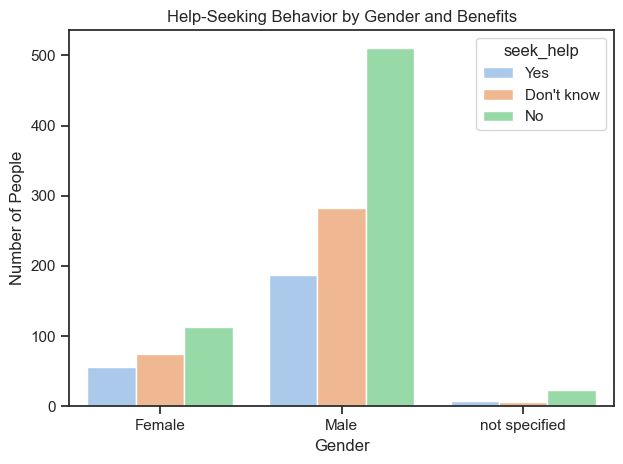

In [41]:
import seaborn as sns
sns.set(style="ticks")

sns.countplot(x='Gender', hue='seek_help', data=df, palette='pastel')
plt.title('Help-Seeking Behavior by Gender and Benefits')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.legend(title='seek_help')
plt.tight_layout()
plt.show()


In [42]:
from scipy.stats import chi2_contingency

# 1. Chi-square Test for Gender, Seek Help, and Benefits
# Contingency table for Gender, Seek Help, and Benefits
contingency_table_gender_help_benefits = pd.crosstab([df['Gender'], df['seek_help']], df['benefits'])

# Perform Chi-square test for Gender, Seek Help, and Benefits
chi2_gender_help_benefits, p_gender_help_benefits, dof_gender_help_benefits, expected_gender_help_benefits = chi2_contingency(contingency_table_gender_help_benefits)

# Display results for Gender, Seek Help, and Benefits
print("Chi-square Test between 'Gender', 'Seek Help', and 'Benefits'")
print(f"Chi2 Value: {chi2_gender_help_benefits}")
print(f"P-Value: {p_gender_help_benefits}")

# Interpretation for Gender, Seek Help, and Benefits
if p_gender_help_benefits < 0.05:
    print("Significant relationship between Gender, Seek Help, and Benefits (Reject Null Hypothesis)")
else:
    print("No significant relationship between Gender, Seek Help, and Benefits (Fail to Reject Null Hypothesis)")


Chi-square Test between 'Gender', 'Seek Help', and 'Benefits'
Chi2 Value: 536.8772917536081
P-Value: 5.364055083814923e-104
Significant relationship between Gender, Seek Help, and Benefits (Reject Null Hypothesis)


In [50]:
# Get total population size
total = len(df)

# Get P(Benefits) for each category
benefit_options = df['benefits'].unique()
p_benefits = df['benefits'].value_counts(normalize=True).to_dict()

# Get genders
genders = df['Gender'].unique()

# Create an empty list to collect Bayesian results
bayes_results = []

for gender in genders:
    for benefit in benefit_options:
        # Numerator: P(Gender ∩ Seek Help | Benefits) * P(Benefits)

        benefit_df = df[df['benefits'] == benefit]
        num = len(benefit_df[(benefit_df['Gender'] == gender) & (benefit_df['seek_help'] == 'Yes')]) / len(benefit_df)
        prior = p_benefits[benefit]

        numerator = num * prior

        # Denominator: P(Gender ∩ Seek Help)
        denominator = len(df[(df['Gender'] == gender) & (df['seek_help'] == 'Yes')]) / total

        if denominator != 0:
            prob = round(numerator / denominator, 4)
        else:
            prob = None  # Avoid division by zero

        bayes_results.append([gender, benefit, prob])

# Convert results to DataFrame
bayes_df = pd.DataFrame(bayes_results, columns=['Gender', 'Benefits', 'P(Benefits | Gender ∩ SeekHelp)'])



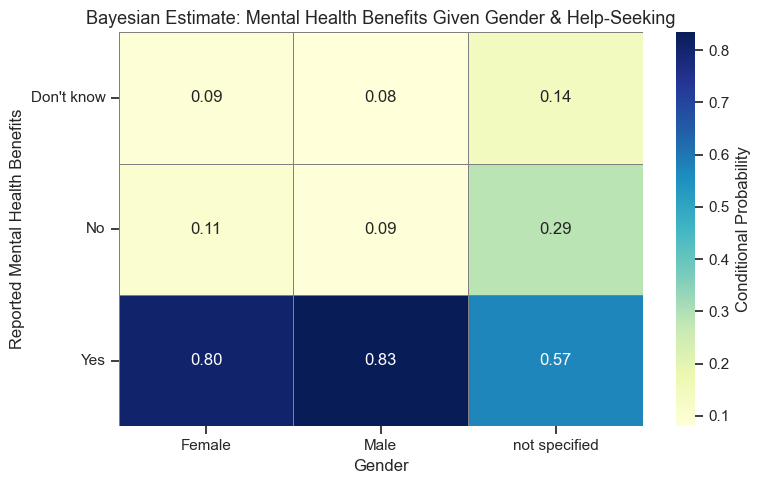

In [52]:
# Reshaping the DataFrame for plotting
plot_ready = bayes_df.pivot_table(
    index='Benefits',
    columns='Gender',
    values='P(Benefits | Gender ∩ SeekHelp)'
)

# Setting up the figure
plt.figure(figsize=(8, 5))
sns.heatmap(
    data=plot_ready,
    annot=True,
    cmap='YlGnBu',
    fmt=".2f",
    linewidths=0.4,
    linecolor='gray',
    cbar_kws={'label': 'Conditional Probability'}
)

# Adding labels and title
plt.title("Bayesian Estimate: Mental Health Benefits Given Gender & Help-Seeking", fontsize=13)
plt.xlabel("Gender")
plt.ylabel("Reported Mental Health Benefits")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
